In [25]:
import numpy as np
import time
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        
        'size'   : 24}

plt.rc('font', **font)

In [3]:
def create_starting_optic(R,r=0.0375,k=-1,N=100):
    r=np.linspace(0,r,N) #solves the problem of not having enough points close to the origin
    z=r*r/(R+np.sqrt(R*R-(k+1)*r*r))
    optic=np.array([r,z])
    return optic

In [93]:
k1 = create_starting_optic(0.1125,N=20)
k05 = create_starting_optic(0.1125,k=-0.5,N=20)

In [96]:
def func(x,n,A):
    return n*x+np.log(A)

# logx=np.log(k1[0][1:])
# logy=np.log((k05[1]-k1[1])[1:])

logx=np.log(k1[0][1:])
logy=np.log((k05[1]-k1[1])[1:])

popt,pcov=curve_fit(func,logx,logy)

In [85]:
x=1.4

print('x %f'%x)

x 1.400000


In [87]:
print('popt %f'%popt[0])

popt 4.007165


In [77]:
np.arange(-0.8,0.8,0.2)

array([-8.00000000e-01, -6.00000000e-01, -4.00000000e-01, -2.00000000e-01,
       -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,  6.00000000e-01])

In [89]:
Alist=[]
for k in np.linspace(-0.8,0.51,100):
    opt=create_starting_optic(0.1125,k=k)
    logx=np.log(k1[0][1:])
    logy=np.log((opt[1]-k1[1])[1:])
    popt,pcov=curve_fit(func,logx,logy)
    Alist.append(popt[1])
    #print('k:%.1f\t n:%f\t A:%f'%(k,popt[0],popt[1]))

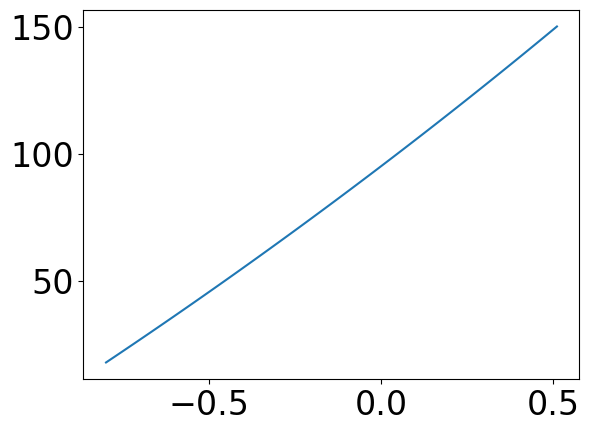

array([0.01102398, 0.0110124 , 0.01098921, 0.01096606, 0.01094295,
       0.01091987, 0.01089682, 0.0108738 , 0.01085082, 0.01082787,
       0.01080495, 0.01078207, 0.01075922, 0.01073641, 0.01071362,
       0.01069087, 0.01066815, 0.01064547, 0.01062282, 0.0106002 ,
       0.01057761, 0.01055506, 0.01053254, 0.01051005, 0.0104876 ,
       0.01046517, 0.01044278, 0.01042043, 0.0103981 , 0.01037581,
       0.01035355, 0.01033132, 0.01030912, 0.01028696, 0.01026483,
       0.01024273, 0.01022066, 0.01019863, 0.01017662, 0.01015465,
       0.01013271, 0.01011081, 0.01008893, 0.01006709, 0.01004528,
       0.0100235 , 0.01000175, 0.00998003, 0.00995835, 0.00993669,
       0.00991507, 0.00989348, 0.00987192, 0.00985039, 0.0098289 ,
       0.00980743, 0.009786  , 0.0097646 , 0.00974322, 0.00972188,
       0.00970057, 0.0096793 , 0.00965805, 0.00963683, 0.00961565,
       0.0095945 , 0.00957337, 0.00955228, 0.00953122, 0.00951019,
       0.00948919, 0.00946822, 0.00944728, 0.00942637, 0.00940

In [ ]:
plt.plot(np.linspace(-0.8,0.51,100),Alist)
plt.show()
np.gradient(np.linspace(-0.8,0.51,100),Alist)

In [66]:
popt

array([ 4.00716462, 45.68614488])

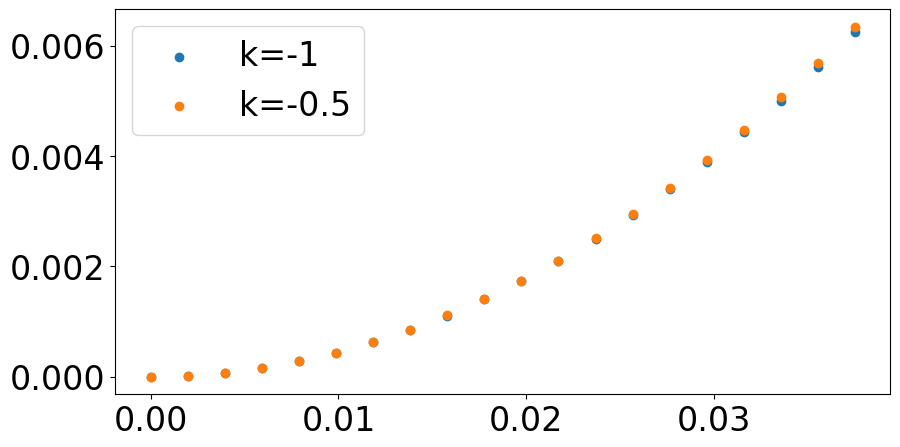

In [94]:
plt.figure(figsize=(10,5))
plt.scatter(k1[0],k1[1],label='k=-1')
plt.scatter(k05[0],k05[1],label='k=-0.5')
plt.legend()
plt.show()

In [69]:
def f(x,n,A):
    return A*x**n

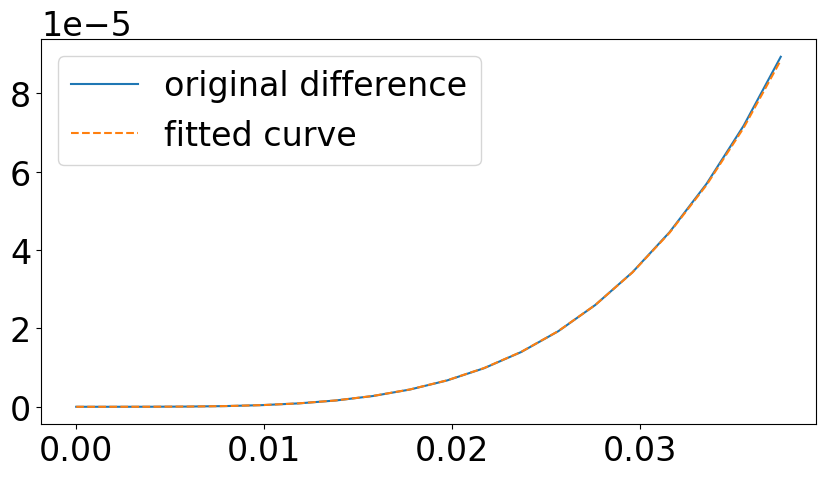

In [97]:
plt.figure(figsize=(10,5))
plt.plot(k1[0],np.abs(k1[1]-k05[1]),label='original difference')
plt.plot(k1[0],f(k05[0],*popt),linestyle='--',label='fitted curve')
plt.legend()
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


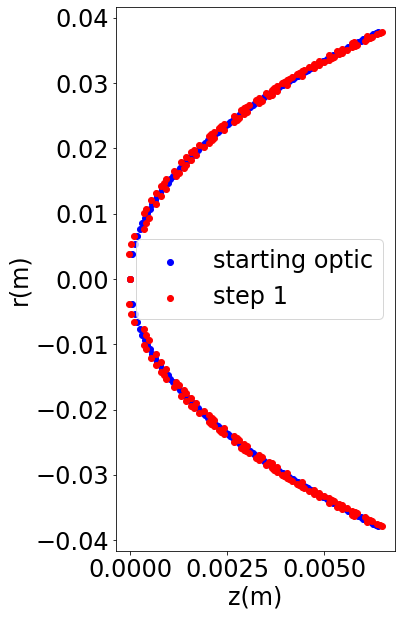

In [6]:
plt.figure(figsize=(5,10))
plt.scatter(start_o[0],start_o[1],c='b',label='starting optic')
plt.scatter(start_o[0],-1*start_o[1],c='b')

plt.scatter(soz,start_o[1],c='r',label='step 1')
plt.scatter(soz,-1*start_o[1],c='r')
plt.xlabel('z(m)')
plt.ylabel('r(m)')
plt.legend()
#plt.savefig('step_1')
plt.show()

In [73]:
k1 = create_starting_optic(0.1125)
k08 = create_starting_optic(0.1125,k=-0.8)

In [74]:
def func(x,n,A):
    return n*x+np.log(A)

# logx=np.log(k1[0][1:])
# logy=np.log((k05[1]-k1[1])[1:])

logx=np.log(k1[0][1:])
logy=np.log((k08[1]-k1[1])[1:])

popt,pcov=curve_fit(func,logx,logy)

In [75]:
popt

array([ 4.00283912, 17.83878008])

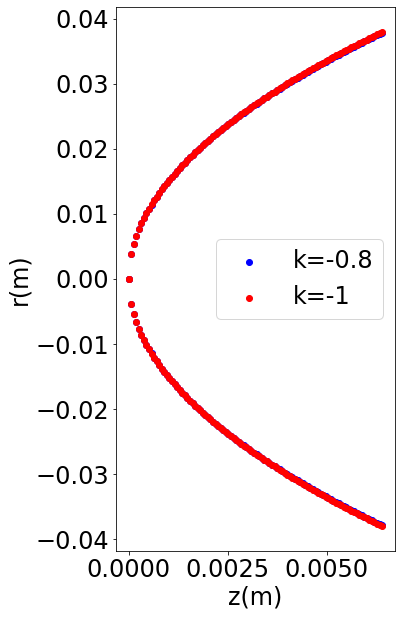

In [7]:
k08 = create_starting_optic(0.0064,0.1125,k=-0.8,N=100)
k1= create_starting_optic(0.0064,0.1125,k=-1,N=100)

plt.figure(figsize=(5,10))
plt.scatter(k08[0],k08[1],c='b',label='k=-0.8')
plt.scatter(k08[0],-1*k08[1],c='b')

plt.scatter(k1[0],k1[1],c='r',label='k=-1')
plt.scatter(k1[0],-1*k1[1],c='r')
plt.xlabel('z(m)')
plt.ylabel('r(m)')
plt.legend()
plt.savefig('diff_k')
plt.show()

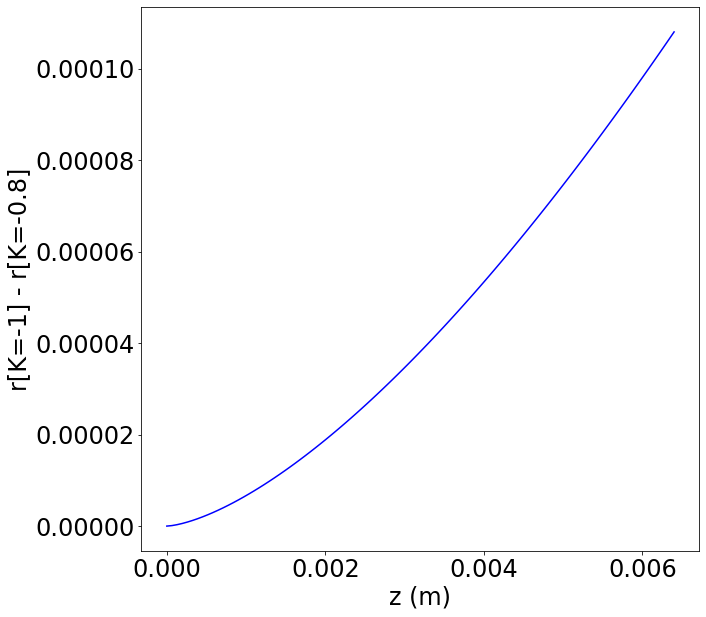

In [10]:
plt.figure(figsize=(10,10))
plt.plot(k08[0],k1[1]-k08[1],c='b',label='k=-0.8')
plt.xlabel("z (m)")
plt.ylabel("r[K=-1] - r[K=-0.8]")
plt.show()

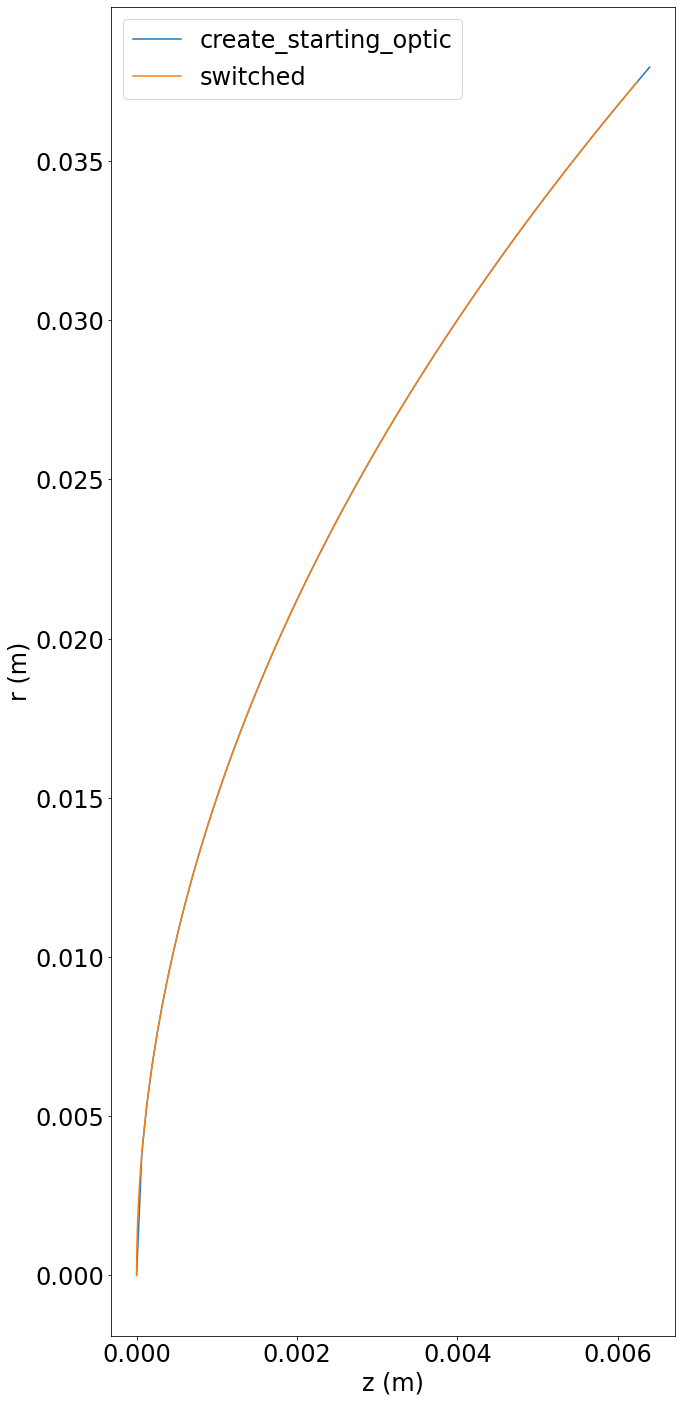

In [11]:
r=np.linspace(0,0.0375,100)
R=0.1125
z08=r**2/(R+np.sqrt(R**2-(1-0.8)*r**2))
z1=r**2/(R+np.sqrt(R**2-(1-1)*r**2))
plt.figure(figsize=(10,20))
plt.plot(k1[0],k1[1],label='create_starting_optic')
plt.plot(z1,r,label='switched')
plt.xlabel("z (m)")
plt.ylabel("r (m)")
plt.legend()
plt.savefig("rotate")
plt.tight_layout()
plt.show()

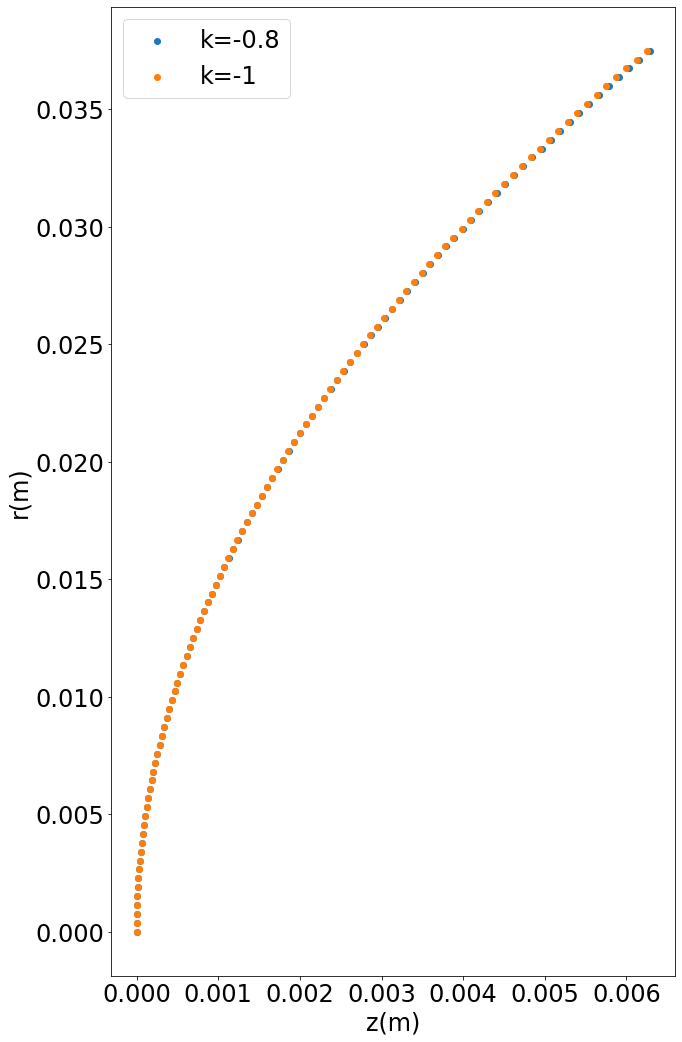

In [20]:
plt.figure(figsize=(10,15))
plt.scatter(z08,r,label='k=-0.8')
plt.scatter(z1,r,label='k=-1')

plt.xlabel('z(m)')
plt.ylabel('r(m)')
plt.legend()
plt.tight_layout()

plt.savefig('k_comp')
plt.show()

In [10]:
len(z1)

100

In [18]:
z1-z08

array([ 0.00000000e+00, -3.61465811e-13, -5.78347265e-12, -2.92789962e-11,
       -9.25368212e-11, -2.25922279e-10, -4.68478280e-10, -8.67926642e-10,
       -1.48066972e-09, -2.37179230e-09, -3.61506385e-09, -5.29294102e-09,
       -7.49657042e-09, -1.03257917e-08, -1.38891412e-08, -1.83038551e-08,
       -2.36958740e-08, -3.01998470e-08, -3.79591360e-08, -4.71258210e-08,
       -5.78607052e-08, -7.03333202e-08, -8.47219321e-08, -1.01213547e-07,
       -1.20003920e-07, -1.41297556e-07, -1.65307723e-07, -1.92256457e-07,
       -2.22374568e-07, -2.55901650e-07, -2.93086088e-07, -3.34185069e-07,
       -3.79464585e-07, -4.29199450e-07, -4.83673302e-07, -5.43178618e-07,
       -6.08016721e-07, -6.78497793e-07, -7.54940882e-07, -8.37673916e-07,
       -9.27033713e-07, -1.02336599e-06, -1.12702539e-06, -1.23837547e-06,
       -1.35778872e-06, -1.48564660e-06, -1.62233952e-06, -1.76826686e-06,
       -1.92383703e-06, -2.08946740e-06, -2.26558439e-06, -2.45262344e-06,
       -2.65102905e-06, -

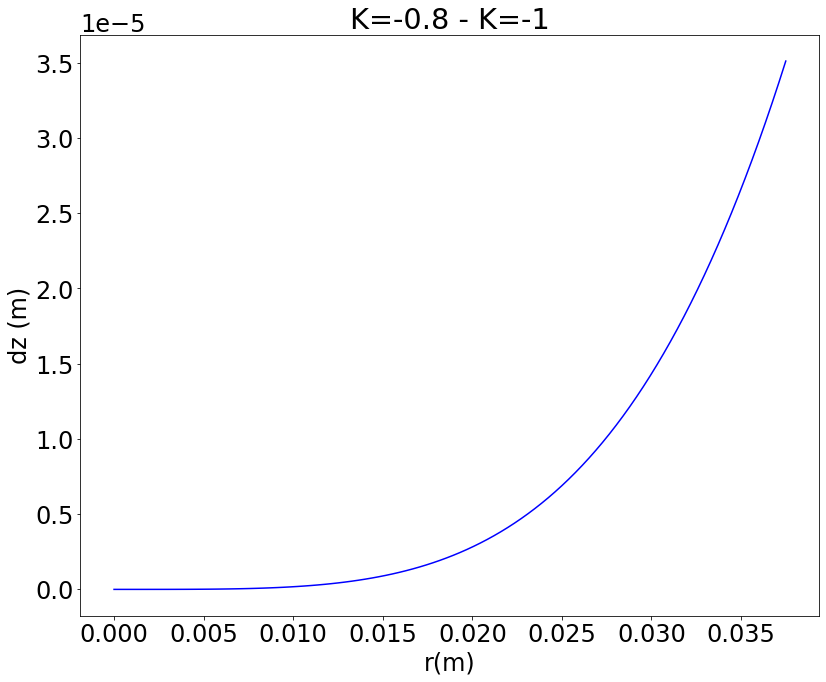

In [19]:
plt.figure(figsize=(12,10))

plt.plot(r,z08-z1,c='b',label='k=-0.8')
plt.xlabel('r(m)')
plt.ylabel('dz (m)')
plt.title("K=-0.8 - K=-1")
plt.tight_layout()
plt.savefig("dz")

plt.show()

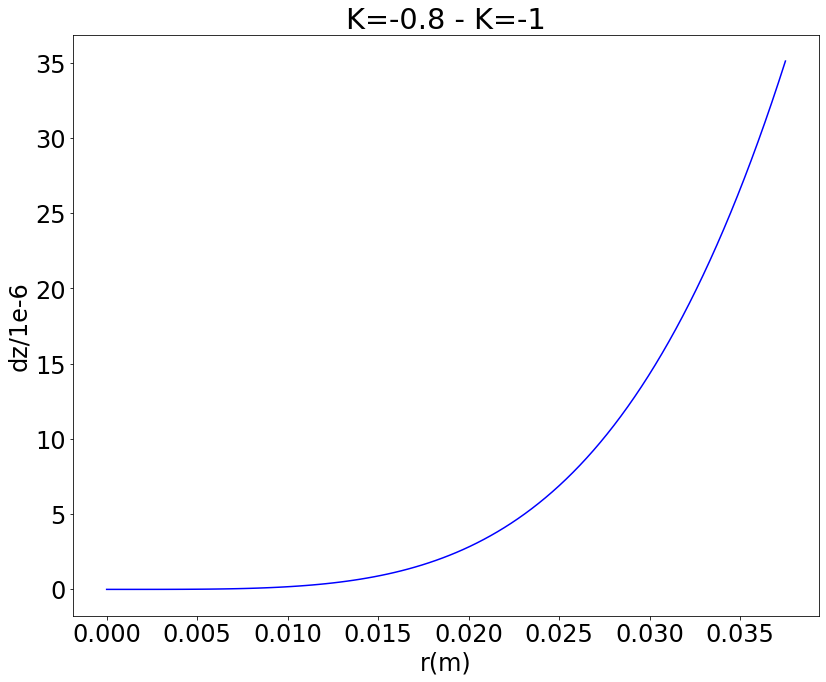

In [39]:
plt.figure(figsize=(12,10))

plt.plot(r,(z08-z1)/1e-6,c='b',label='k=-0.8')
plt.xlabel('r(m)')
plt.ylabel('dz/1e-6')
plt.title("K=-0.8 - K=-1")
plt.tight_layout()
plt.savefig("dz_norm")

plt.show()